In [ ]:
listaAdj = {} # para cada chave (cidade) é gerado um lista de adjacentes
vizinhos = []
dados = open("cidades.txt","r")
linha = dados.readline()
while linha:
    valores = linha.split(",")
    if valores[0] in listaAdj:
      vizinhos = listaAdj.get(valores[0])
      vizinhos.append(valores[1])
      listaAdj[valores[0]] = vizinhos
    else:
      vizinhos = []
      listaAdj[valores[0]] = list()
      vizinhos.append(valores[1])
      listaAdj[valores[0]] = vizinhos    
    
    linha = dados.readline()

dados.close()


In [ ]:
print(listaAdj)

{'Arad': ['Zerind', 'Timisoara', 'Sibiu'], 'Zerind': ['Oradea'], 'Oradea': ['Sibiu'], 'Timisoara': ['Lugoj'], 'Lugoj': ['Mehadia'], 'Mehadia': ['Drobeta'], 'Drobeta': ['Craiova'], 'Craiova': ['Rimnicu_Vilcea', 'Pitesti'], 'Sibiu': ['Fagaras', 'Rimnicu_Vilcea'], 'Rimnicu_Vilcea': ['Pitesti'], 'Fagaras': ['Bucharest'], 'Pitesti': ['Bucharest'], 'Bucharest': ['Urziceni', 'Giurgiu'], 'Urziceni': ['Vaslui', 'Hirsova'], 'Vaslui': ['Iasi'], 'Iasi': ['Neamt'], 'Hirsova': ['Eforie']}


In [ ]:
import networkx as nx

In [ ]:
# Fonte https://www.geeksforgeeks.org/visualize-graphs-in-python/
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        #plt.show()

Busca Gulosa

- https://github.com/salahbeeh/Greedy-BFS-.VS-BFS/blob/master/Greedy%20BFS%20Graph/BFS%20Graph.py

- https://github.com/coderIlluminatus/Artificial-Intelligence/blob/master/IIIT-A%20Lab%20(IAIN532C)/Lab%202/romanian_paths.py

In [ ]:
import queue as Q

In [ ]:
def getHeuristics(size):
	heuristics = {}
	f = open('heuristics.txt')
	for i in range(size):
		node_heuristic_val = f.readline().split()
		heuristics[node_heuristic_val[0]] = node_heuristic_val[1]
	return heuristics

In [ ]:
def getFilaPrioridade(list, distancias):
	#print(list)
	q = Q.PriorityQueue()
	for node in list:
		#print(type(distancias[node]))
		q.put(distancias[node],node)
	return q,len(list)

In [ ]:
def getNomeCidade(d, val):
    return [k for k, v in d.items() if v == val]


In [ ]:
class Greedy:
    def __init__(self, objetivo):
        self.objetivo = objetivo
        self.achou = False
        self.visitado ={}

    def setVisitados(self, list):
        for i in list:
            self.visitado[i] = False  #Borda/Fronteira      

    def buscar(self, atual, distancias, graph):
        print("\nAtual: %s" % atual)
        self.visitado[atual] = True
        
        if atual == self.objetivo:
            self.achou = True
        else:
            self.lista = []
            self.filaP, tamanho = getFilaPrioridade(listaAdj[atual],distancias)
                           
            for i in range(tamanho):
              #Obtem o menor de custo na Fila de prioridades
              self.custo = self.filaP.get()
              #Obtem o nome da cidade a partir do custo (valor único!)
              self.cidade = getNomeCidade(distancias, self.custo) 
              #print(self.cidade)
              #lista esta em formato list. Recupera sempre o indice [0]
              #Vértice com menor custo             
              self.lista.append(self.cidade[0])
              graph.addEdge(atual, self.cidade[0])
            
            #Percorrer os vizinhos da cidade contida em lista              
            for i in self.lista:            
                 if self.achou is not True:
                   print("Ir para cidade: %s" % i)
                   if self.visitado[i] == False:
                       Greedy.buscar(self, i, distancias, graph)                    


Atual: Arad
Ir para cidade: Sibiu

Atual: Sibiu
Ir para cidade: Fagaras

Atual: Fagaras
Ir para cidade: Bucharest

Atual: Bucharest


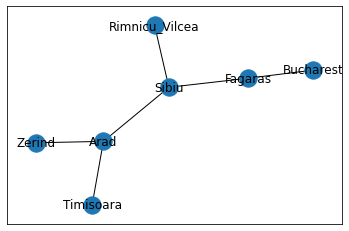

In [ ]:
cidades = list(listaAdj.keys())
#print(cidades)
heuristics = getHeuristics(20)
#print(heuristics)
G = GraphVisualization()
greedy = Greedy('Bucharest')
greedy.setVisitados(cidades)
greedy.buscar('Arad', heuristics, G)
G.visualize()

## **Exemplo com Fila de Prioridade:**

In [ ]:
from queue import PriorityQueue
customers = PriorityQueue() #we initialise the PQ class instead of using a function to operate upon a list. 
customers.put((366, 'Arad'))
customers.put((393, 'Sibiu'))
customers.put((449, 'Zerind'))
customers.put((447, 'Timisoara'))
customers.put((671, 'Oradea'))
customers.put((415, 'Fagaras'))
customers.put((413, 'Rimnicu'))
customers.put((526, 'Craiova'))
customers.put((417, 'Pitesti'))
customers.put((0, 'Bucharest'))
while not customers.empty():
   print(customers.get())


(0, 'Bucharest')
(366, 'Arad')
(393, 'Sibiu')
(413, 'Rimnicu')
(415, 'Fagaras')
(417, 'Pitesti')
(447, 'Timisoara')
(449, 'Zerind')
(526, 'Craiova')
(671, 'Oradea')
